# Autoencoders

## Autoencoders Brief

Autoencoders are a type of neural network designed to learn efficient codings of input data. They work by compressing the input into a latent-space representation and then reconstructing the output from this representation. This process involves two main parts: the encoder $ f $ and the decoder $ g $. The encoder maps the input $ x $ to an internal representation or code $ h $, while the decoder maps this code $ h $ back to the output $ r $, which is a reconstruction of the original input.

![AE_GraphNet1](../ML_Image/GraphicalOperationofAE.PNG)

To further clarify latent space $ h $, we can use the concept of **Efficient Data Representations**. Consider two sequences: one random and one with a clear pattern (38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16). Despite the first sequence being shorter, the second sequence is easier to memorize because it follows a recognizable pattern of decreasing even numbers. This illustrates why autoencoders are designed to extract and encode such patterns from the input data into the latent space during training.

***Performing PCA with an Undercomplete Linear Autoencoder***
If the autoencoder uses only linear activations and the cost function is the mean squared error (MSE), then it ends up performing Principal Component Analysis.

### Structure of Autoencoders

1. **Encoder**: The encoder compresses the input data into a latent-space representation, reducing its dimensionality. It consists of one or more layers that progressively reduce the size of the input.

2. **Latent Space**: The compressed representation of the input data, also known as the bottleneck. This part of the network contains the most crucial information needed to reconstruct the original input.

3. **Decoder**: The decoder reconstructs the input data from the latent representation. It consists of one or more layers that progressively increase the size of the data back to the original input dimensions.

### AE formulation

The encoder can generally be described as a function $ g $ that depends on certain parameters, denoted as $ h_i = g(x_i) $, where $ h_i \in \mathbb{R}^q $ represents the latent feature extracted by the encoder block when applied to the input $ x_i $. Here, the function $ g $ maps from $ \mathbb{R}^n $ to $ \mathbb{R}^q $.

The decoder, which produces the network's output denoted by $ \tilde{x}_i $, is then a function $ f $ of the latent features: $ \tilde{x}_i = f(h_i) = f(g(x_i)) $, where $ \tilde{x}_i \in \mathbb{R}^n $.

Training an autoencoder involves finding the functions $ g(·) $ and $ f(·) $ that minimize the difference between the input and output, which is captured by a loss function $ \Delta(x_i, \tilde{x}_i) $. This loss function penalizes discrepancies between the input $ x_i $ and the reconstructed output $ \tilde{x}_i $, and the goal is to minimize this loss across all observations.

To avoid an autoencoder learning the identity function, strategies such as applying regularization are used to ensure more meaningful feature learning.

**Regularization in Autoencoders**

Regularization often involves enforcing sparsity in the latent features. A common approach is to include an $\ell_1$ or $\ell_2$ regularization term in the loss function. For $\ell_2$ regularization, the objective is:

$$
\argmin_{f, g} \left( \Delta(x_i, \tilde{x}_i) + \lambda \|g(x_i)\|_2^2 \right)
$$

Here, $\Delta(x_i, \tilde{x}_i)$ represents the loss function measuring the difference between the input $x_i$ and the output $\tilde{x}_i$, and $\|g(x_i)\|_2^2$ is the $\ell_2$ norm of the latent features with $\lambda$ as the regularization parameter. The parameters $\theta_i$ in the functions $f(·)$ and $g(·)$ are typically the weights in neural networks.

## Define Architecture

There are three key parts of a neural network’s architecture:
- input, body , output

![AE_Structure1](../ML_Image/AE_structure.PNG)

### Guide for Showing Architecture

1. Install Graphviz and pydot.
2. If you encounter an error while plotting, download Graphviz from [https://graphviz.gitlab.io/download/](https://graphviz.gitlab.io/download/), then extract the files and add the directory to your system's PATH. For example, if you extract the files to "Program Files," add the following path:
   ```
   C:\Program Files\Graphviz-12.0.0-win64\bin
   ```
3. After setting up the PATH, check the following code. The output should be:
   ```
   pydot and Graphviz are properly installed.
   ```

In [12]:
import pydot
from tensorflow.keras.utils import plot_model

def check_graphviz():
    try:
        pydot.Dot.create(pydot.Dot())
        print("pydot and Graphviz are properly installed.")
    except Exception as e:
        print(f"An error occurred: {e}")

check_graphviz()

pydot and Graphviz are properly installed.


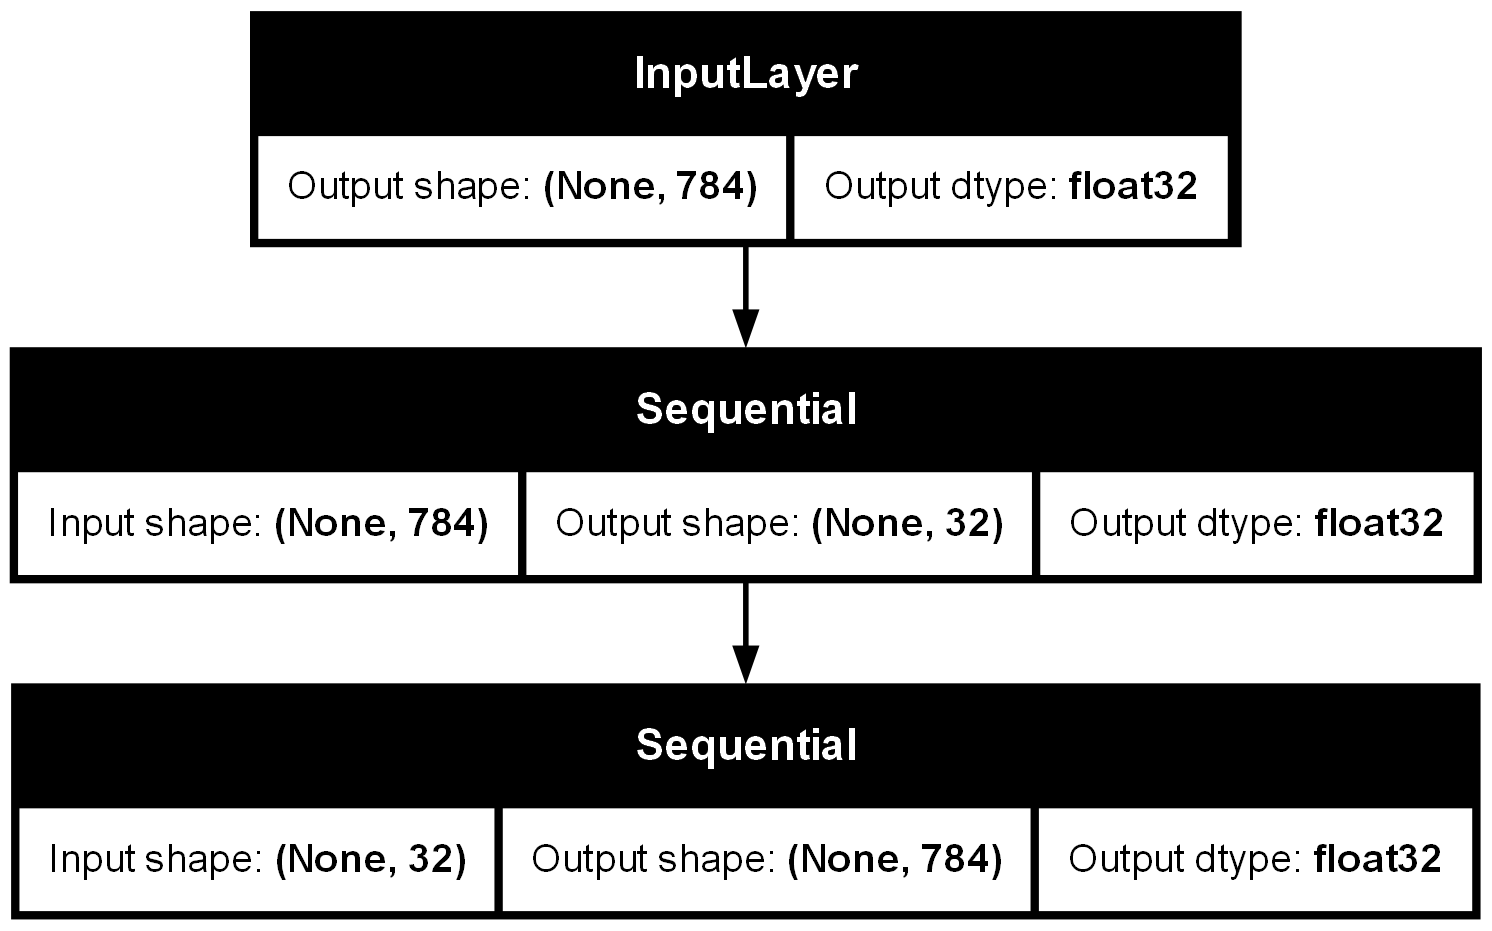

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import os

# Define Encoder
encoder = Sequential(name='encoder')
encoder.add(Input(shape=(784,)))
encoder.add(Dense(256, activation='relu'))
encoder.add(Dense(64, activation='relu'))
encoder.add(Dense(32, activation='relu'))

# Define Decoder
decoder = Sequential(name='decoder')
decoder.add(Input(shape=(32,)))
decoder.add(Dense(64, activation='relu'))
decoder.add(Dense(256, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))

# Define Full Autoencoder Model
# Note: Use Functional API to connect encoder and decoder
input_layer = Input(shape=(784,))
encoded = encoder(input_layer)
decoded = decoder(encoded)
model = Model(inputs=input_layer, outputs=decoded)
plot_model(model, show_shapes=True, show_dtype=True)



### Latent features in handwritten digits 
Latent features in handwritten digits, such as the number and angle of lines needed to form each digit, encapsulate essential information that does not rely on the gray values of each pixel in an image. Humans learn to write by understanding these fundamental components rather than focusing on pixel-level details.

![Latent features in handwritten digits1](../ML_Image/LatentFeatureHandwrittenDigit.PNG)


## Example : Denoising MNIST using AE

Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.4093 - val_loss: 0.1479
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2046 - val_loss: 0.1131
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1804 - val_loss: 0.0997
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1689 - val_loss: 0.0912
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1629 - val_loss: 0.0862
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1586 - val_loss: 0.0821
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1559 - val_loss: 0.0799
Epoch 8/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1526 - val_loss: 0.0779
Epoch 9/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1514 - val_loss: 0.0764
Epoch 10/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1513 - val_loss: 0.0755
Epoch 11/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1483 - val_loss: 0.0744
Epoch 12/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1

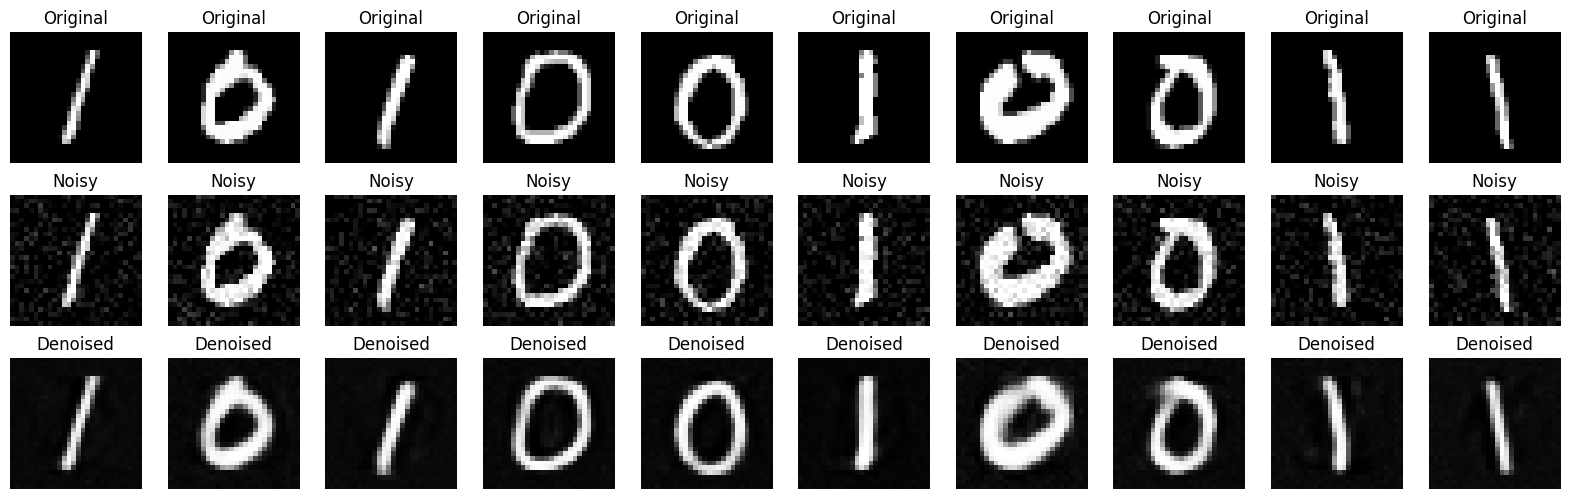

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import keras.layers as L
from keras.models import Sequential

# Load the MNIST dataset from a local .npz file
mnist_data = np.load('mnist.npz')

# Extract the training and test sets
x_train = mnist_data['x_train']
y_train = mnist_data['y_train']
x_test = mnist_data['x_test']
y_test = mnist_data['y_test']

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Filter the dataset to include only digits 0 and 1
train_filter = np.where((y_train == 0) | (y_train == 1))
test_filter = np.where((y_test == 0) | (y_test == 1))

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

# Generate noisy versions of the training data
noise_factor = 0.1
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)

# Combine clean and noisy training data
x_train_combined = np.concatenate([x_train, x_train_noisy])

# Define the Autoencoder model
encoder = Sequential(name='encoder')
encoder.add(L.Input((784,)))
encoder.add(L.Dense(256, activation='relu'))
encoder.add(L.Dense(64, activation='relu'))
encoder.add(L.Dense(32, activation='relu'))

decoder = Sequential(name='decoder')
decoder.add(L.Input((32,)))
decoder.add(L.Dense(64, activation='relu'))
decoder.add(L.Dense(256, activation='relu'))
decoder.add(L.Dense(784, activation='sigmoid'))

autoencoder = Sequential([encoder, decoder])
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the Autoencoder on the combined data
autoencoder.fit(x_train_combined, x_train_combined, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Add noise to the test data
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Denoise the test data
x_test_denoised = autoencoder.predict(x_test_noisy)

# Visualize the results
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Denoised
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test_denoised[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

plt.show()


### Test Only

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


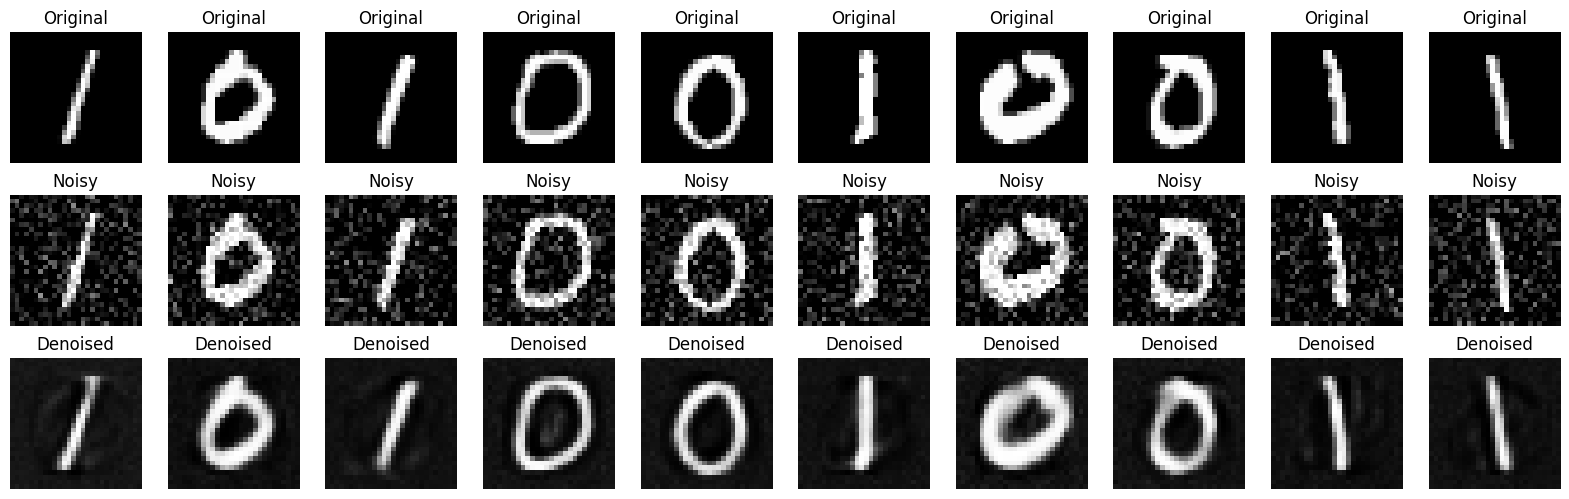

In [34]:
noise_factor=0.2
# Add noise to the test data
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Denoise the test data
x_test_denoised = autoencoder.predict(x_test_noisy)

# Visualize the results
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Denoised
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test_denoised[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

plt.show()


## Denoising with AE

### General Algorithm for Denoising Images Using an Autoencoder

**Load and Preprocess the Data**
- Load the dataset containing the images. This can be any image dataset, not limited to MNIST.
- Convert the images to grayscale (if necessary) and resize them to a consistent size.
- Normalize the pixel values to be between 0 and 1 by dividing by 255.

**Prepare Noisy and Clean Data**
- Create noisy versions of the images by adding Gaussian noise with varying noise levels.
- Combine the noisy images with the original (clean) images to create training data pairs: `(noisy_image, clean_image)`.

**Define the Autoencoder Architecture**
- **Encoder**: The encoder should reduce the dimensionality of the input images by passing them through several Dense or Convolutional layers with ReLU activation. The output of the encoder is a latent representation of the input image.
- **Decoder**: The decoder should reconstruct the clean images from the latent representation by passing the latent space through several Dense or Convolutional layers with ReLU or sigmoid activation.

**Compile the Model**
- Compile the autoencoder model using an optimizer like Adam and a loss function such as binary crossentropy or mean squared error (MSE).

**Train the Autoencoder**
- Train the autoencoder using the pairs of noisy and clean images. Use a validation set for monitoring the model's performance during training.

**Evaluate the Model**
- After training, test the autoencoder on a separate set of noisy images to evaluate its performance.
- Predict the denoised images using the autoencoder and compare them with the clean images.

**Visualize the Results**
- Visualize a few examples of the original, noisy, and denoised images to qualitatively assess the model's performance.



Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.3746 - val_loss: 0.1681
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2167 - val_loss: 0.1303
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1922 - val_loss: 0.1158
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1828 - val_loss: 0.1088
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1758 - val_loss: 0.1002
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1691 - val_loss: 0.0945
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1652 - val_loss: 0.0909
Epoch 8/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1620 - val_loss: 0.0876
Epoch 9/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1584 - val_loss: 0.0847
Epoch 10/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1569 - val_loss: 0.0824
Epoch 11/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1546 - val_loss: 0.0806
Epoch 12/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.

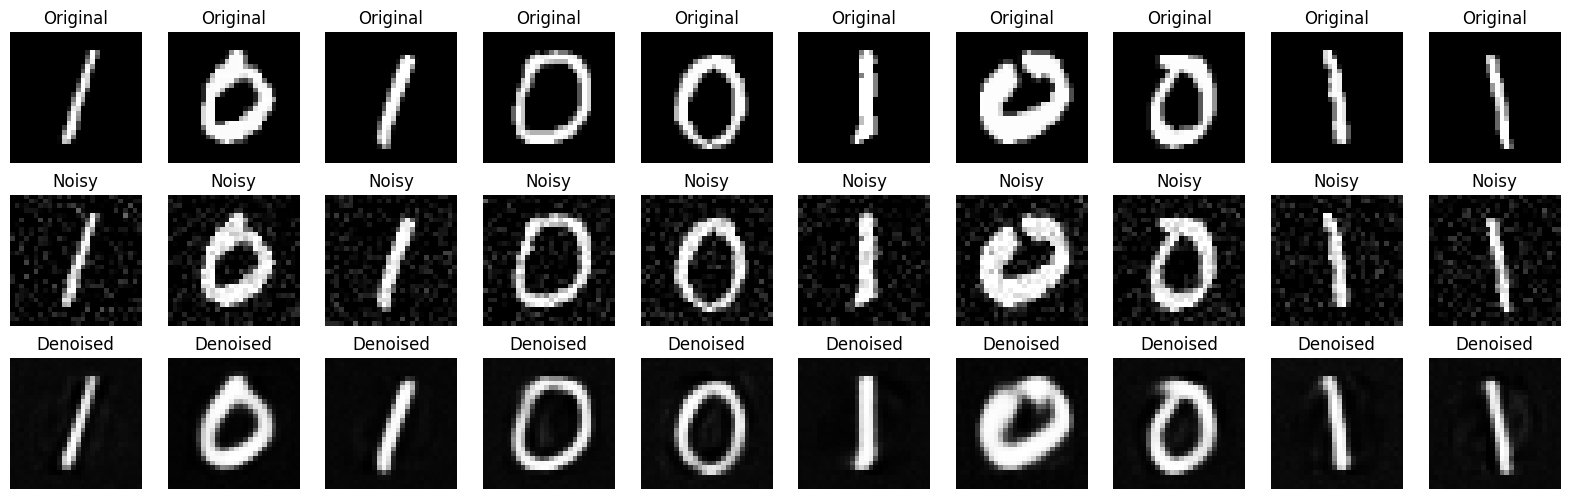

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import keras.layers as L
from keras.models import Sequential



import tensorflow as tf

# Custom activation function 1: Example using sine
def custom_activation1(x):
    return tf.math.sin(x)

# Custom activation function 2: Example using softplus-like activation
def custom_activation2(x):
    return tf.math.log(1 + tf.exp(x))


# Load the MNIST dataset from a local .npz file
mnist_data = np.load('mnist.npz')

# Extract the training and test sets
x_train = mnist_data['x_train']
y_train = mnist_data['y_train']
x_test = mnist_data['x_test']
y_test = mnist_data['y_test']

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Filter the dataset to include only digits 0 and 1
train_filter = np.where((y_train == 0) | (y_train == 1))
test_filter = np.where((y_test == 0) | (y_test == 1))

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

# Generate noisy versions of the training data
noise_factor = 0.1
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)

# Combine clean and noisy training data
x_train_combined = np.concatenate([x_train, x_train_noisy])

# Define the Autoencoder model with custom activations
encoder = Sequential(name='encoder')
encoder.add(L.Input((784,)))
encoder.add(L.Dense(256))
encoder.add(L.Lambda(custom_activation1))  # Use custom_activation1
encoder.add(L.Dense(64))
encoder.add(L.Lambda(custom_activation2))  # Use custom_activation2
encoder.add(L.Dense(32))
encoder.add(L.Lambda(custom_activation1))  # Use custom_activation1 again

decoder = Sequential(name='decoder')
decoder.add(L.Input((32,)))
decoder.add(L.Dense(64))
decoder.add(L.Lambda(custom_activation2))  # Use custom_activation2
decoder.add(L.Dense(256))
decoder.add(L.Lambda(custom_activation1))  # Use custom_activation1
decoder.add(L.Dense(784, activation='sigmoid'))  # Use sigmoid for the output layer

# Compile the Autoencoder model
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the Autoencoder on the combined data
autoencoder.fit(x_train_combined, x_train_combined, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Add noise to the test data
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Denoise the test data
x_test_denoised = autoencoder.predict(x_test_noisy)

# Visualize the results
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Denoised
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test_denoised[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

plt.show()


### Training Autoencoders

Autoencoders are trained to minimize the reconstruction error, which is the difference between the input and the output. The goal is for the autoencoder to learn to capture the most important features of the data in the latent space.

The loss function used for training is typically the Mean Squared Error (MSE) or Binary Cross-Entropy, depending on the nature of the input data.

### Types of Autoencoders

1. **Vanilla Autoencoders**: The basic form of autoencoders, consisting of a simple encoder-decoder architecture with fully connected layers.

2. **Convolutional Autoencoders**: Use convolutional layers instead of fully connected layers, making them well-suited for image data. They can capture spatial hierarchies and local patterns.

3. **Denoising Autoencoders**: Trained to reconstruct the input from a corrupted version of it. This helps the model to learn robust representations that are less sensitive to noise.

4. **Sparse Autoencoders**: Encourage sparsity in the latent representation by adding a regularization term to the loss function. This forces the model to learn more useful features.

5. **Variational Autoencoders (VAEs)**: Instead of learning a deterministic latent representation, VAEs learn a probabilistic representation. This makes them suitable for generating new data samples.

### Applications of Autoencoders

1. **Dimensionality Reduction**: Autoencoders can be used to reduce the dimensionality of data, similar to PCA but capable of capturing non-linear relationships.

2. **Anomaly Detection**: By training on normal data, autoencoders can identify anomalies when the reconstruction error is significantly high.

3. **Denoising**: Denoising autoencoders can be used to remove noise from data, improving the quality of signals or images.

4. **Data Generation**: Variational autoencoders can generate new data samples similar to the training data, useful in tasks like image synthesis and data augmentation.

5. **Feature Learning**: Autoencoders can learn useful features from the data that can be used in other machine learning tasks.